## 회귀 문제 (회귀함수 추정문제)
데이터 $\{(x_i, y_i)\}_{i=1}^n$ 이 다음과 같은 회귀모형으로부터 관측되었다.
$$
y_i = f(x_i) + \varepsilon_i
$$
회귀 문제의 목표는 관측된 데이터 $\{(x_i, y_i)\}_{i=1}^n$ 를 이용하여 회귀함수 $f$ 를 추정하는 것이다. 
참고로, $f$ 는 예측변수들과 반응변수의 관계를 나타내는 규칙이라고 이해할 수 있다. 
반응에는 규칙 $f$ 에 랜덤오차 $\varepsilon_i$ 가 더해져 관측되기 때문에, 오차를 얼마나 잘 제거하여 실제 규칙을 얼마나 잘 recover 하는지가 중요하다.

여기서, 임의로 데이터를 생성하여 $f$ 를 추정하는 예제를 다루고자 한다.

In [86]:
import numpy as np
# 데이터 생성
np.random.seed(1)
n = 200
x = np.linspace(0, 1, n)
f = 2 * x
y = f + np.random.normal(0, 0.5, n)

## 예제 데이터
해당 예제에서 관측치 수 $n$ 은 $100$ 으로 설정하였다. 
다음 회귀모형으로부터 데이터를 생성하였다. 
$$
y_i = f(x_i) + \varepsilon_i = 2 x_i + \varepsilon_i 
$$
랜덤오차는 평균 $0$ 이고 표준편차가 $0.5$ 인 정규분포로부터 생성하였다.
회귀함수와 데이터는 다음과 같다. 

모의실험에서는 회귀함수 (규칙) 을 직접 설정하여 알고 있지만, 실제 데이터 문제에서 보통 회귀함수는 알려지지 않고 데이터만 주어진다.

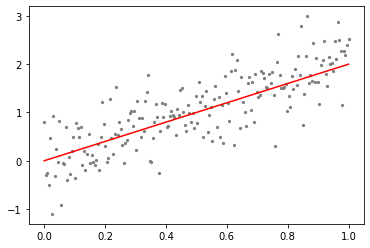

In [87]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 5, c = "gray")
plt.plot(x, f, color = 'red')
plt.show()

## 최소제곱법
데이터 $\{(x_i, y_i)\}_{i=1}^n$ 를 활용하여 회귀함수의 추정량을 계산해보려고 한다. 
추정법으로 랜덤 포레스트, 딥러닝 등 다양한 알고리즘이 존재하지만, 여기서 간단하게 선형회귀 방법을 통해 추정량을 계산하기로 한다.
먼저, 다음과 추정량의 형태로 단순선형회귀 모형을 가정해보자.
$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$
대부분의 회귀 방법론에서 회귀계수를 추정함으로써 회귀함수에 대한 추정량을 계산할 수 있고, 이 예제에서 $\beta = (\beta_0, \beta_1)$ 에 대한 회귀계수 추정량 $\hat \beta$ 를 계산하면 된다. 
여기서 목적함수와 최적화 문제는 각각
$$
R(\beta) = \frac{1}{2n} \sum_{i = 1}^n \left(y_i - \beta_0 - \beta_1 x_i \right)^2, \quad
\hat \beta = \text{argmin}_{\beta} R(\beta)
$$
이다.
최소제곱법을 통한 회귀계수 추정량은 
$$
\hat \beta = (X^{\top} X)^{-1} X^{\top} Y
$$
로 계산할 수 있다. 여기서 $X$ 는 설계행렬, $Y$ 는 반응변수 관측치들을 모아놓은 벡터이다. 

그러면 회귀함수 추정량은 
$$
\hat f = \hat \beta_0 + \hat \beta_1 x 
$$
로 정의된다. 

In [88]:
X = np.c_[np.ones(n), x]
XtX = np.dot(X.T, X)
XtY = np.dot(X.T, y)
betahat = np.linalg.solve(XtX, XtY)
fitted_values = np.dot(X, betahat)

## 시각화
추정량에 대해 시각화를 해보자!

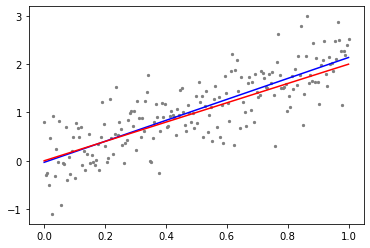

In [89]:
plt.scatter(x, y, s = 5, c = "gray")
plt.plot(x, fitted_values, color = 'blue')
plt.plot(x, f, color = 'red')
plt.show()

## 내 생각
이 예제에서 실제로 회귀함수를 모른다는 가정 하에, 가장 일반적인 단순선형회귀 방법론 (절편항 포함)을 활용하여 데이터의 규칙을 찾아내고자 했다. 
미리 규칙에 대한 정보를 알고 있으면, 그 정보를 활용하여 모형을 구축하는 것이 데이터 분석의 핵심이라 생각한다. 
분석 전, 데이터 관계의 정보를 EDA 를 포함한 다양한 방식으로 파악하는 것이 중요하며, 이를 모형 구축 및 데이터 분석 과정에 사용하는 것이 중요하다. 

참고
1. 복잡도가 높은 최신 기법들을 사용하는 것이 항상 좋은 결과를 가져다 주지 않는다.
2. 복잡한 모형을 사용하는 경우, 보통은 결과에 대한 해석이 더 어려워진다.

다음과 같이 상대적으로 복잡도가 높은 모형을 가정하고 추정을 진행해보면, 특정 부분에서 과하게 데이터를 적합하는 경향을 보여준다.
$$
y_i = \beta_0 + \sum_{j=1}^6 \beta_j x_i^j + \varepsilon_i
$$

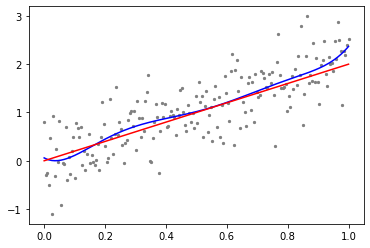

In [90]:
X = np.c_[np.ones(n), x, x**2, x**3, x**4, x**5, x**6]
XtX = np.dot(X.T, X)
XtY = np.dot(X.T, y)
betahat = np.linalg.solve(XtX, XtY)
fitted_values = np.dot(X, betahat)
plt.scatter(x, y, s = 5, c = "gray")
plt.plot(x, fitted_values, color = 'blue')
plt.plot(x, f, color = 'red')
plt.show()